### Assignment for Week-6: Path Sampling, A firework of algorithm

**B.**

In this Section, you vastly improve on the algorithm **naive_harmonic_path.py**.

**B1.** 

Download (cut-and-paste) and run the below program, a variant of naive_harmonic_path.py

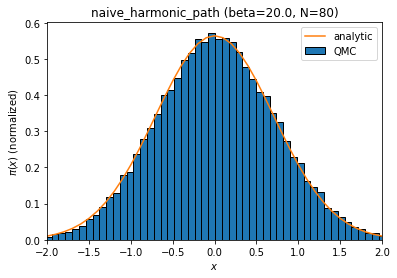

In [1]:
import math, random, pylab

def rho_free(x, y, beta):
    return math.exp(-(x - y) ** 2 / (2.0 * beta))

beta = 20.0
N = 80
dtau = beta / N
delta = 1.0
n_steps = 4000000
x = [5.0] * N
data = []
for step in range(n_steps):
    k = random.randint(0, N - 1)
    knext, kprev = (k + 1) % N, (k - 1) % N
    x_new = x[k] + random.uniform(-delta, delta)
    old_weight  = (rho_free(x[knext], x[k], dtau) *
                   rho_free(x[k], x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x[k] ** 2))
    new_weight  = (rho_free(x[knext], x_new, dtau) *
                   rho_free(x_new, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x_new ** 2))
    if random.uniform(0.0, 1.0) < new_weight / old_weight:
        x[k] = x_new
    if step % N == 0:
        k = random.randint(0, N - 1)
        data.append(x[k])

pylab.hist(data,  bins=100, density= True, stacked = True, ec = "black", label='QMC')
list_x = [0.1 * a for a in range (-30, 31)]
list_y = [math.sqrt(math.tanh(beta / 2.0)) / math.sqrt(math.pi) * \
          math.exp(-x ** 2 * math.tanh(beta / 2.0)) for x in list_x]
pylab.plot(list_x, list_y, label='analytic')
pylab.legend()
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$ (normalized)')
pylab.title('naive_harmonic_path (beta=%s, N=%i)' % (beta, N))
pylab.xlim(-2, 2)
#pylab.savefig('plot_B1_beta%s.png' % beta)
pylab.show()


**Keep this program for further usage**

- This Markov-chain algorithm depends on an initial condition. Which initial condition is programmed in the algorithm? 

**Answer:** The initial value of **x[k] == [5.0,..., 5.0]** is used as an initial condition in this algorithm.

**B2.**

- Modify this algorithm,  so that it outputs the final path configuration onto a file (the one at  the end of the simulation). Upload a graphics file of a configuration  of the path, that is,on the x-axis: the positions x[0], ..., x[N-1], and  on the y-axis the "imaginary time" variable 0, beta/N, 2*beta/N..

Text(0.5, 1.0, 'Levy path (beta=20, Nmax=80)')

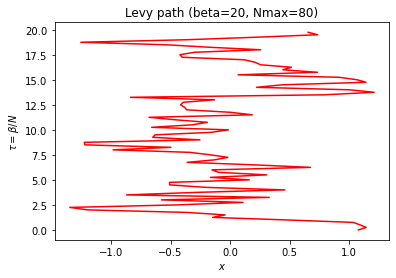

In [2]:
#Generate the imaginary time tau for beta = 20, N = 80
beta = 20.0
N = 80
tau = []
for i in range(0,N):
    dtau = i*beta / N
    tau.append(dtau)
#Take the saved data of x generated from the program    
pylab.plot(x, tau, color='red')
pylab.xlabel('$x$')
pylab.ylabel('$\\tau = \\beta/ N$')
pylab.title('Levy path (beta=20, Nmax=80)')

**B2.**

Now modify the original program from **Section B1**  by introducing levy_harmonic_path. For simplicity, we provide the function levy_harmonic_path that you should use.

**def levy_harmonic_path(xstart, xend, dtau, N):<br>
    x = [xstart]<br>
    for k in range(1, N):<br>
        dtau_prime = (N - k) * dtau<br>
        Ups1 = 1.0 / math.tanh(dtau) + \<br>
               1.0 / math.tanh(dtau_prime)<br>
        Ups2 = x[k - 1] / math.sinh(dtau) + \ <br>
               xend / math.sinh(dtau_prime)<br>
        x.append(random.gauss(Ups2 / Ups1, \ <br>
               1.0 / math.sqrt(Ups1)))<br>
    return x<br>**
    
This function (which returns a list of N elements) should replace the naive construction for the N elements, and you should call it as

**x = levy_harmonic_path(x[0], x[0], dtau, N)**

- In order to change the position x[0], "roll over" the entire path, by introducing the line (with Ncut = N/2):    x = x[Ncut:] + x[:Ncut] after each call of the levy_harmonic_path construction. Use a few "print" statements, at small N, and **explain in two sentences what x = x[Ncut:] + x[:Ncut] does**. Do not forget to explain what the "+" operation is good for.

In [3]:
import math, random, pylab

#introduce the function the levy_harmonic path
def levy_harmonic_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        Ups1 = 1.0 / math.tanh(dtau) + \
               1.0 / math.tanh(dtau_prime)
        Ups2 = x[k - 1] / math.sinh(dtau) + \
               xend / math.sinh(dtau_prime)
        x.append(random.gauss(Ups2 / Ups1, \
               1.0 / math.sqrt(Ups1)))
    return x

beta = 20.0
N = 4
dtau = beta / N
delta = 1.0
n_steps = 10 
x = [5.0] * N

for step in range(n_steps):
    print("Step No.: ", step)
    #print("------------------------------------------------------------------------------------------")
    print("Initial x:", x)
    x = levy_harmonic_path(x[0], x[0], dtau, N)
    print("From levy_harmonic_path, x:", x)
    Ncut = int(N/2.0)
    x = x[Ncut:] + x[:Ncut]  
    print("After reshuffling, x:", x)
    print("------------------------------------------------------------------------------------------")
    


Step No.:  0
Initial x: [5.0, 5.0, 5.0, 5.0]
From levy_harmonic_path, x: [5.0, -0.38730539537416453, -0.4721125150718176, -0.5453703366519889]
After reshuffling, x: [-0.4721125150718176, -0.5453703366519889, 5.0, -0.38730539537416453]
------------------------------------------------------------------------------------------
Step No.:  1
Initial x: [-0.4721125150718176, -0.5453703366519889, 5.0, -0.38730539537416453]
From levy_harmonic_path, x: [-0.4721125150718176, -1.516897984113649, 1.1238696787674336, -0.22823713785181257]
After reshuffling, x: [1.1238696787674336, -0.22823713785181257, -0.4721125150718176, -1.516897984113649]
------------------------------------------------------------------------------------------
Step No.:  2
Initial x: [1.1238696787674336, -0.22823713785181257, -0.4721125150718176, -1.516897984113649]
From levy_harmonic_path, x: [1.1238696787674336, -0.5032249797570377, 0.6159782457737832, 1.1095661320284453]
After reshuffling, x: [0.6159782457737832, 1.10956613

**Answer:** The code is updated as asked. <br>
**x = x[Ncut:] + x[:Ncut]** This command basically takes the last half of 'x' and the first half of 'x' and form a new set of x such that the order is reversed. This step helps us to update the x[0] at every step. 

The '+' operation basically joins two sets of data (size N/2) and forms a new data set (size N).   

**B2 (continued...)**
- Upload a histogram obtained for beta=20 with N=80.  Fill in your  histogram from random "beads", as in Section B1:

k = random.randint(0, N-1)<br>
data.append(x[k])

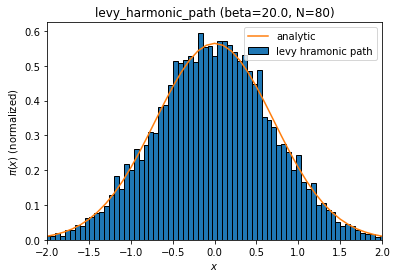

In [4]:
import math, random, pylab

def levy_harmonic_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        Ups1 = 1.0 / math.tanh(dtau) + \
               1.0 / math.tanh(dtau_prime)
        Ups2 = x[k - 1] / math.sinh(dtau) + \
               xend / math.sinh(dtau_prime)
        x.append(random.gauss(Ups2 / Ups1, \
               1.0 / math.sqrt(Ups1)))
    return x

beta = 20.0
N = 80
dtau = beta / N
delta = 1.0
n_steps = 1000000
x = [5.0] * N
data1 = []
for step in range(n_steps):
    x = levy_harmonic_path(x[0], x[0], dtau, N)
    Ncut = int(N/2.0)
    x = x[Ncut:] + x[:Ncut]  
    if step % N == 0:
        k = random.randint(0, N - 1)
        data1.append(x[k])
        
pylab.hist(data1,  bins=100, density= True, stacked = True, ec = "black", label='levy hramonic path')
list_x = [0.1 * a for a in range (-30, 31)]
list_y = [math.sqrt(math.tanh(beta / 2.0)) / math.sqrt(math.pi) * \
          math.exp(-x ** 2 * math.tanh(beta / 2.0)) for x in list_x]
pylab.plot(list_x, list_y, label='analytic')
pylab.legend()
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$ (normalized)')
pylab.title('levy_harmonic_path (beta=%s, N=%i)' % (beta, N))
pylab.xlim(-2, 2)
#pylab.savefig('plot_B1_beta%s.png' % beta)
pylab.show()

**B2 (continued)**

- Explain why this algorithm implements the "partial freezing" + "direct sampling" concept of Section A2. (Hint: there is very little "partial freezing", but it is there).

**NB:**  The program in this Section **B2** is very powerful and uses no approximation. In particular, it does not use the Trotter approximation. To see this, run the algorithm for N=2 (increase n_steps) , rather than for N=80, and convince yourself that the histogram of the positions is unchanged. You may want to check that the program in Section **B1** is only correct in the limit beta/N -> 0. Again, run the program in Section **B1** for N=2, and convince yourself that the histogram of the positions is greatly changed.

**Answer:** This algorithm gives the output such that there is no rejection unlike that is seen in QMC. In order to capture the attributes pertaining to low $\tau = \beta/N$ (freezing state) and low rejection rate, the algorithm implements both partial freezing" + "direct sampling".

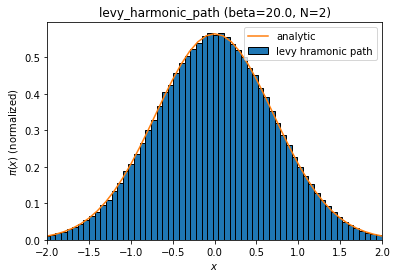

In [5]:
import math, random, pylab

def levy_harmonic_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        Ups1 = 1.0 / math.tanh(dtau) + \
               1.0 / math.tanh(dtau_prime)
        Ups2 = x[k - 1] / math.sinh(dtau) + \
               xend / math.sinh(dtau_prime)
        x.append(random.gauss(Ups2 / Ups1, \
               1.0 / math.sqrt(Ups1)))
    return x

beta = 20.0
N = 2
dtau = beta / N
delta = 1.0
n_steps = 1000000
x = [5.0] * N
data1 = []
for step in range(n_steps):
    x = levy_harmonic_path(x[0], x[0], dtau, N)
    Ncut = int(N/2.0)
    x = x[Ncut:] + x[:Ncut]  
    if step % N == 0:
        k = random.randint(0, N - 1)
        data1.append(x[k])
        
pylab.hist(data1,  bins=100, density= True, stacked = True, ec = "black", label='levy hramonic path')
list_x = [0.1 * a for a in range (-30, 31)]
list_y = [math.sqrt(math.tanh(beta / 2.0)) / math.sqrt(math.pi) * \
          math.exp(-x ** 2 * math.tanh(beta / 2.0)) for x in list_x]
pylab.plot(list_x, list_y, label='analytic')
pylab.legend()
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$ (normalized)')
pylab.title('levy_harmonic_path (beta=%s, N=%i)' % (beta, N))
pylab.xlim(-2, 2)
#pylab.savefig('plot_B1_beta%s.png' % beta)
pylab.show()

**B3.**

In order to improve even farther the algorithm of Section B2, reason as follows:

- One knows the distribution of the x positions.  It is given by pi(x) = sqrt[tanh(beta / 2) / pi] exp[-x^2 * tanh(beta/2)]

- x[0] may be sampled from this distribution. The rest of the path can then be filled in with the harmonic Lévy construction.

Therefore, modify the program of section B2 by sampling x[0] from its exact distribution, pi(x_0) \propto exp( - x_0 **2 * tanh( beta / 2.0)), that is, a Gaussian with standard deviation sigma = 1.0 / sqrt( 2.0 * tanh( beta / 2.0)). Your new program should thus contain a line

**x[0] = random.gauss(0.0, sigma)**

(or equivalent), where sigma is the standard deviation of  pi(x), and this line should be followed by the harmonic Levy construction. There is no more "wrapping", no more need for an initial condition and no more partial freezing.


In [6]:
import math, random, pylab

def levy_harmonic_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        Ups1 = 1.0 / math.tanh(dtau) + \
               1.0 / math.tanh(dtau_prime)
        Ups2 = x[k - 1] / math.sinh(dtau) + \
               xend / math.sinh(dtau_prime)
        x.append(random.gauss(Ups2 / Ups1, \
               1.0 / math.sqrt(Ups1)))
    return x

beta = 20.0
N = 4
dtau = beta / N
delta = 1.0
n_steps = 10
x = [5.0] * N
sigma = 1.0 / math.sqrt( 2.0 * math.tanh( beta / 2.0))
data2 = []
for step in range(n_steps):
    print("Step No.: ", step)
    print("Initial x:", x)
    x[0] = random.gauss(0.0, sigma)
    print("After modifying x[0]:", x)
    x = levy_harmonic_path(x[0], x[0], dtau, N)
    print("After reshuffling, x:", x)
    print("------------------------------------------------------------------------------------------")

Step No.:  0
Initial x: [5.0, 5.0, 5.0, 5.0]
After modifying x[0]: [-0.21009504194912146, 5.0, 5.0, 5.0]
After reshuffling, x: [-0.21009504194912146, -0.414136660261855, 1.9357042374014286, -0.5420718656735607]
------------------------------------------------------------------------------------------
Step No.:  1
Initial x: [-0.21009504194912146, -0.414136660261855, 1.9357042374014286, -0.5420718656735607]
After modifying x[0]: [0.7176831197813798, -0.414136660261855, 1.9357042374014286, -0.5420718656735607]
After reshuffling, x: [0.7176831197813798, -0.27014398972648945, -0.38379309106620607, 0.04861502123877862]
------------------------------------------------------------------------------------------
Step No.:  2
Initial x: [0.7176831197813798, -0.27014398972648945, -0.38379309106620607, 0.04861502123877862]
After modifying x[0]: [0.04697756214282305, -0.27014398972648945, -0.38379309106620607, 0.04861502123877862]
After reshuffling, x: [0.04697756214282305, 0.14525644265125354, -0.

Now,

- Explain in one sentence why $\sigma = 1 / \sqrt{ 2 \tanh ( \beta/2)}$ is the standard deviation of the distribution $\pi(x) \propto exp( - x^2 \tanh( \beta / 2))$.

**Answer:** A Gaussian typical distribution function is given by, $\pi(x) \propto e^{- \frac{(x - \mu)^2)}{2\sigma^2}}$ <br>
where, $\mu$ = mean and $\sigma$ = standard deviation.<br>

Comparing this two equation, we obtain,

$\sigma^2 = 1/2\tanh( \beta / 2)$ and $\sigma =  1 / \sqrt{ 2 \tanh ( \beta/2)}$


**B3 (continued..)**

- Check that this beautiful program recovers the exact result for  pi(x): produce the normed histogram of x for beta=20, and compare it  with the analytic expression of pi(x).  Upload the resulting graphics  file.

NB: This direct-sampling algorithm is statistically equivalent to the Markov-chain program you wrote in Section B2.


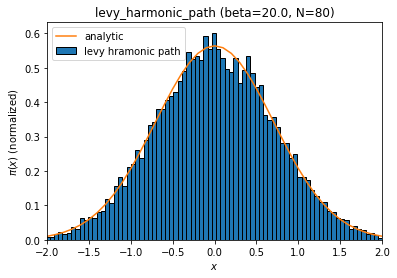

In [7]:
import math, random, pylab

def levy_harmonic_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        Ups1 = 1.0 / math.tanh(dtau) + \
               1.0 / math.tanh(dtau_prime)
        Ups2 = x[k - 1] / math.sinh(dtau) + \
               xend / math.sinh(dtau_prime)
        x.append(random.gauss(Ups2 / Ups1, \
               1.0 / math.sqrt(Ups1)))
    return x

beta = 20.0
N = 80
dtau = beta / N
delta = 1.0
n_steps = 1000000
x = [5.0] * N
sigma = 1.0 / math.sqrt( 2.0 * math.tanh( beta / 2.0))
data2 = []
for step in range(n_steps):
    x[0] = random.gauss(0.0, sigma)
    #print("step-1", x)
    x = levy_harmonic_path(x[0], x[0], dtau, N)
    #print("step-2", x)
    #Ncut = int(N/2.0)
    #x = x[Ncut:] + x[:Ncut]  
    if step % N == 0:
        k = random.randint(0, N - 1)
        data2.append(x[k])
        
pylab.hist(data2,  bins=100, density= True, stacked = True, ec = "black", label='levy hramonic path')
list_x = [0.1 * a for a in range (-30, 31)]
list_y = [math.sqrt(math.tanh(beta / 2.0)) / math.sqrt(math.pi) * \
          math.exp(-x ** 2 * math.tanh(beta / 2.0)) for x in list_x]
pylab.plot(list_x, list_y, label='analytic')
pylab.legend()
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$ (normalized)')
pylab.title('levy_harmonic_path (beta=%s, N=%i)' % (beta, N))
pylab.xlim(-2, 2)
#pylab.savefig('plot_B1_beta%s.png' % beta)
pylab.show()